In [1]:
import os
from PIL import Image
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

In [2]:
dir_path = "/home/jupyter"
train_dir = 'train'
val_dir = 'val'

In [3]:
base_dir = '/home/jupyter'
train_dir = os.path.join(base_dir, 'train')

labels = ['0', '1', '2', '3', '4']

def label_dirs(path, label):
    for label in labels:
        label_dir = os.path.join(path, label)
        print(label_dir)

# Directory with the various classes
train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')
train_2_dir = os.path.join(train_dir, '2')
train_3_dir = os.path.join(train_dir, '3')
train_4_dir = os.path.join(train_dir, '4')

In [4]:
label_dirs(base_dir, labels)

/home/jupyter/0
/home/jupyter/1
/home/jupyter/2
/home/jupyter/3
/home/jupyter/4


In [9]:
print('total train 0 images :', len(os.listdir(train_0_dir)))
print('total train 1 images :', len(os.listdir(train_1_dir)))
print('total train 2 images :', len(os.listdir(train_2_dir)))
print('total train 3 images :', len(os.listdir(train_3_dir)))
print('total train 4 images :', len(os.listdir(train_4_dir)))

total train 0 images : 27291
total train 1 images : 2737
total train 2 images : 6186
total train 3 images : 1106
total train 4 images : 985


In [11]:
val_dir = os.path.join(base_dir, 'val')

# Directory with the various classes
val_0_dir = os.path.join(val_dir, '0')
val_1_dir = os.path.join(val_dir, '1')
val_2_dir = os.path.join(val_dir, '2')
val_3_dir = os.path.join(val_dir, '3')
val_4_dir = os.path.join(val_dir, '4')

In [12]:
print('total val 0 images :', len(os.listdir(val_0_dir)))
print('total val 1 images :', len(os.listdir(val_1_dir)))
print('total val 2 images :', len(os.listdir(val_2_dir)))
print('total val 3 images :', len(os.listdir(val_3_dir)))
print('total val 4 images :', len(os.listdir(val_4_dir)))

total val 0 images : 493
total val 1 images : 101
total val 2 images : 273
total val 3 images : 53
total val 4 images : 80


In [13]:
train_0_fnames = os.listdir(train_0_dir)
train_1_fnames = os.listdir(train_1_dir)
train_2_fnames = os.listdir(train_2_dir)
train_3_fnames = os.listdir(train_3_dir)
train_4_fnames = os.listdir(train_4_dir)

print(train_0_fnames[:10])
print(train_1_fnames[:10])
print(train_2_fnames[:10])
print(train_3_fnames[:10])
print(train_4_fnames[:10])

['10660_left.jpeg', '10356_left.jpeg', '27827_right.jpeg', '26433_left.jpeg', '13312_right.jpeg', '08b6e3240858.png', '6883_left.jpeg', '43711_right.jpeg', '16343_right.jpeg', '5515_right.jpeg']
['36745_left.jpeg', '27677_right.jpeg', '29894_right.jpeg', '14981_left.jpeg', '20315_left.jpeg', '12268_right.jpeg', '34456_right.jpeg', '23170_left.jpeg', '13751_left.jpeg', '22360_left.jpeg']
['35734_right.jpeg', '42237_left.jpeg', '32320_left.jpeg', '36361_left.jpeg', '41806_right.jpeg', '4674_right.jpeg', '33956_right.jpeg', '1636_right.jpeg', '21139_left.jpeg', '31159_left.jpeg']
['17586_right.jpeg', '7026_right.jpeg', '24232_left.jpeg', '3096_left.jpeg', '33551_left.jpeg', '34918_left.jpeg', '29418_right.jpeg', 'aIDRiD_009.jpg', '11147_right.jpeg', '36336_left.jpeg']
['22894_left.jpeg', '37958_left.jpeg', '94ef1d14597f.png', '13938_left.jpeg', '13819_right.jpeg', '32149_left.jpeg', '20752_right.jpeg', '6017_left.jpeg', '15414_right.jpeg', 'bIDRiD_002.jpg']


In [14]:
val_0_fnames = os.listdir(val_0_dir)
val_1_fnames = os.listdir(val_1_dir)
val_2_fnames = os.listdir(val_2_dir)
val_3_fnames = os.listdir(val_3_dir)
val_4_fnames = os.listdir(val_4_dir)

print(val_0_fnames[:10])
print(val_1_fnames[:10])
print(val_2_fnames[:10])
print(val_3_fnames[:10])
print(val_4_fnames[:10])

['883c6a184f16.png', 'a1872f9c0cba.png', 'f00ce9b9d6f4.png', 'fc782722a50c.png', 'c546670d9684.png', '4fd5ec0dca09.png', '103f97a2ab15.png', '519c6e8f78dc.png', 'c25e02b39c01.png', '25b4080f598b.png']
['1c0cf251b426.png', 'b8ebedd382de.png', '2a08ed6bbcbc.png', 'a75bab2463d4.png', '4f7755e74a9e.png', 'ad3fc5076852.png', '7ef5ff774a48.png', 'c8fc0df22999.png', 'eed4afc8ec83.png', '2994f17f58a5.png']
['ee6e39319b39.png', 'abf09c44d5f4.png', '5723d0ec895e.png', '7743f4e04a6d.png', 'a0a0cd8af5a6.png', '9a78c6a7b1c2.png', '2cbfc6182ba2.png', '7f84284598f5.png', '85cc6d636898.png', '2c1d5be654dd.png']
['2f42e20db938.png', '8958a4d17b7e.png', '90b8bf342032.png', '6baafa56895c.png', '3b018e8b7303.png', 'e13412678eff.png', 'd3e884109b45.png', '6b128e648646.png', '2bbd1f99ecc3.png', 'd868acdccb5b.png']
['21d18b022429.png', '6cd606dc52e9.png', '46d3316c4857.png', 'b70cb31b9abb.png', '5e7db41b3bee.png', '2fde69f20585.png', 'e019b3e0f33d.png', 'bdff5d8bddf8.png', '84c663f39632.png', 'ed3a0fc5b546.p

In [5]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            # print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
            # print(img.shape)
        return img

In [16]:
# colour crop
#def load_ben_color(path, img_size, sigmaX=10):
#    image = cv2.imread(path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    image = crop_image_from_gray(image)
#    image = cv2.resize(image, (img_size, img_size))
#    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
#    return image

In [8]:
# need to create processed dataset
def preprocess_images(directory, target_dir, labels, img_size=256, sigmaX=10):
    for label in labels:
        direct = os.path.join(directory, label)
        for file_name in os.listdir(direct):
            image = cv2.imread(os.path.join(direct, file_name))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = crop_image_from_gray(image)
            image = cv2.resize(image, (img_size, img_size))
            image = cv2.addWeighted(image,4, cv2.GaussianBlur(image , (0,0) , sigmaX) ,-4 ,128)   
            output_path = os.path.join(target_dir, label)
            cv2.imwrite(os.path.join(output_path, file_name), image)
    print("All done")        
    # would be good to add progress bar

In [8]:
def preprocess_images(directory, target_dir, img_size=256, sigmaX=10):
    for file_name in tqdm(os.listdir(directory)):
        image = cv2.imread(os.path.join(directory, file_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = crop_image_from_gray(image)
        image = cv2.resize(image, (img_size, img_size))
        image = cv2.addWeighted(image,4, cv2.GaussianBlur(image , (0,0) , sigmaX) ,-4 ,128)   
        cv2.imwrite(os.path.join(target_dir, file_name), image)
    print("All done")        

In [9]:
source = '/home/jupyter/train/4'
dest = '/home/jupyter/train_process/4'
preprocess_images(source, dest)

 24%|██▍       | 229/937 [01:01<03:26,  3.42it/s]

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [9]:
labels = ['0', '1', '2', '3', '4']
directory = '/home/jupyter/train'
target_dir = '/home/jupyter/train_process'
preprocess_images(directory, target_dir, labels)

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
directory = '/home/jupyter/val'
target_dir = '/home/jupyter/val_process'
preprocess_images(directory, target_dir, labels)

In [21]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images

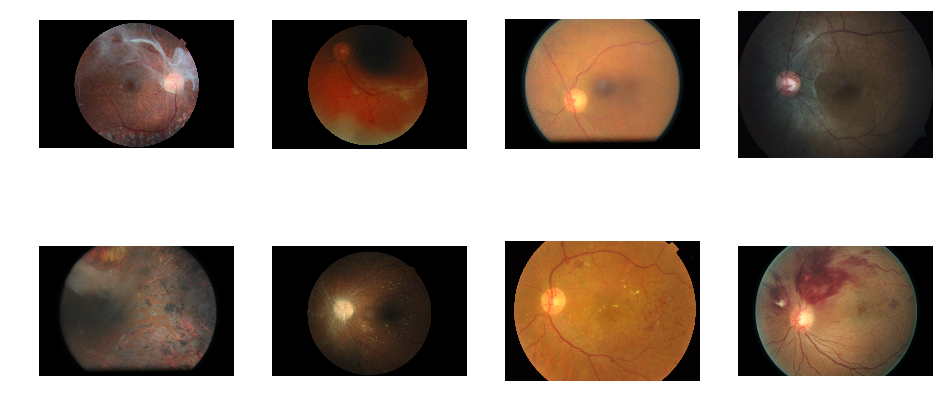

In [29]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_0_pix = [os.path.join(train_0_dir, fname) 
                for fname in train_0_fnames[pic_index-8:pic_index] 
               ]

next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_fnames[pic_index-8:pic_index]
               ]

next_2_pix = [os.path.join(train_2_dir, fname) 
                for fname in train_2_fnames[pic_index-8:pic_index]
               ]

next_3_pix = [os.path.join(train_3_dir, fname) 
                for fname in train_3_fnames[pic_index-8:pic_index]
               ]

next_4_pix = [os.path.join(train_4_dir, fname) 
                for fname in train_4_fnames[pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_4_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()